# Reaksjonskinetikk -  koblede reaksjoner

Vi ser på to reaksjoner $A \rightarrow B$ og $A \rightarrow C$ som pågår parallellt, med ratekonstanter henholdsvis $k_1$ og $k_2$. 

Rateligningene er

\begin{equation}
\frac{d}{dt}C_A = - (k_1 + k_2) C_A,
\end{equation}

\begin{equation}
\frac{d}{dt}C_B = k_1 C_A,
\end{equation}

og 

\begin{equation}
\frac{d}{dt}C_C = k_2 C_A,
\end{equation}

hvor $C_M$ betegner konsentrasjonen til $M$. ($C$ har dobbel betydning). Disse ligningene er *koblede*, kan du se hvorfor?

---

Ligningene har en analytisk løsning, gitt som

\begin{equation}
C_A(t) = [A]_0e^{- (k_1 + k_2)t},
\end{equation}

\begin{equation}
C_B = \frac{k_1}{k_1 + k_2}[A]_0 \left(1 - e^{-(k_1 + k_2)t} \right),
\end{equation}

og 

\begin{equation}
C_C = \frac{k_2}{k_1 + k_2}[A]_0 \left(1 - e^{-(k_1 + k_2)t} \right),
\end{equation}

hvor $[A]_0$ er konsentrasjonen av $A$ ved tiden $t=0$.

---

### Oppgave

Gjør en diskretisering av tiden $t$ og benytt Eulers metode for å løse ligningene. 

Plott resultatet og sammenlign med den analytiske løsningen. 

Benytt $A_0=10 M$, $k_1 = 0.005 s^{-1}$ og $k_2 = 0.030 s^{-1}$.

**Ekstra** Med jevne tidsintervaller, tilfør løsningen en dråpe med reaktant $A$ ved å øke konsentrasjonen brått (*tips*: bruk en `if`-test for `n%jevnt_intervall == 0`). Hvordan påvirker dette resultatene?

## Finn oppdateringsskjema

1. Vi diskretiserer tiden $t$:

$$ t \rightarrow t_i := i \cdot \Delta t$$

2. Bruker fremoverdifferansen 


\begin{equation}
\frac{d}{dt}C_A(t_n) \approx \mathbf{D}^+C_A(t_n) = - (k_1 + k_2) C_A(t_n),
\end{equation}

\begin{equation}
\frac{C_A(t_{n+1}) - C_A(t_n)}{\Delta t} = - (k_1 + k_2) C_A(t_n),
\end{equation}

Løs for $C_A(t_{n+1})$:

\begin{equation}
C_A(t_{n+1}) =  C_A(t_n)- (k_1 + k_2) C_A(t_n)\Delta t
\end{equation}

Ved samme fremgangsmåte kan vi finne

\begin{equation}
C_B(t_{n+1}) = C_B(t_{n}) + k_1 C_A(t_{n+1}) \Delta t
\end{equation}

og 

\begin{equation}
C_C(t_{n+1}) = C_C(t_{n}) + k_2 C_A(t_{n+1}) \Delta t
\end{equation}


## Implementasjon

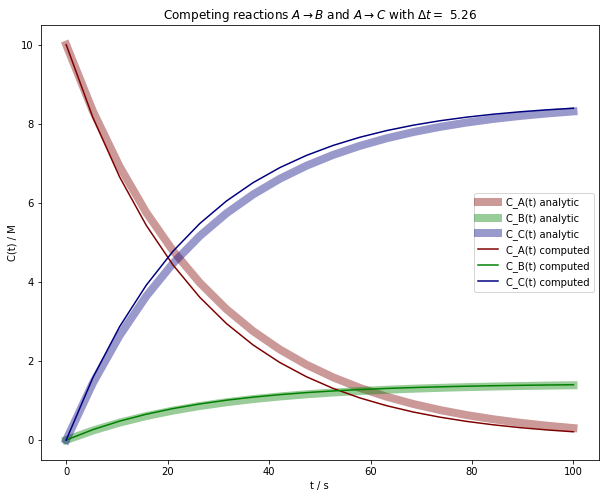

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Initial values and constants

A_0 = 10    # Initial concentration of A_0
k_1 = 0.005 # Reaction constant 1
k_2 = 0.030 # Reaction constant 2

# Simulation parameters

Ndt = 20                   # number of timesteps
t = np.linspace(0,100,Ndt) # array with all times
dt = t[1]                  # stepsize

# Analytic solutions, functions of time

C_A = lambda t : A_0*np.exp(-(k_1+k_2)*t)
C_B = lambda t : k_1/(k_1 + k_2)*A_0*(1 - np.exp(-(k_1 + k_2)*t))
C_C = lambda t : k_2/(k_1 + k_2)*A_0*(1 - np.exp(-(k_1 + k_2)*t))

# Arrays for discrete concentrations
CA = np.zeros(Ndt, dtype = float)
CB = np.zeros(Ndt, dtype = float)
CC = np.zeros(Ndt, dtype = float)

CA[0] = A_0 # initial value for C_A(t=0)

# Forward Euler iterations
for n in np.arange(Ndt-1): 
    CA[n+1] = CA[n] - (k_1 + k_2)*CA[n]*dt
    CB[n+1] = CB[n] + k_1*CA[n]*dt
    CC[n+1] = CC[n] + k_2*CA[n]*dt
    
# Visualize results
plt.figure(1, figsize = (10,8))
plt.title("Competing reactions $A \\rightarrow B$ and $A \\rightarrow C$ with $\\Delta t =$ %.2f" % dt )
# Plot analytical expressions
plt.plot(t, C_A(t), label = "C_A(t) analytic", color = (.5,0,0), linewidth = 8.0, alpha = .4)
plt.plot(t, C_B(t), label = "C_B(t) analytic", color = (0,.5,0), linewidth = 8.0, alpha = .4)
plt.plot(t, C_C(t), label = "C_C(t) analytic", color = (0,0,.5), linewidth = 8.0, alpha = .4)

# Plot computed results
plt.plot(t, CA, label = "C_A(t) computed", color = (.5,0,0))
plt.plot(t, CB, label = "C_B(t) computed", color = (0,.5,0))
plt.plot(t, CC, label = "C_C(t) computed", color = (0,0,.5))
plt.legend()
plt.xlabel("t / s")
plt.ylabel("C(t) / M")
plt.show()